In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import time
import torch 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Import Training and Testing Dataset
df_Train = pd.read_csv("train.csv",index_col=["Id"])
df_Test = pd.read_csv("test.csv",index_col=["Id"]).join(pd.read_csv("sample_submission.csv",index_col=["Id"]))
df_Train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
df_Train.shape, df_Test.shape

((1460, 80), (1459, 80))

In [4]:
# Display all colums with desriptions
with pd.option_context('display.max_rows', 100, 'display.max_columns', 20):
    display(df_Train.describe(include="all").transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,1460,5,Inside,1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Create dataset containing all the columns with a null value
df_Null = pd.DataFrame(df_Train.isnull().sum(),columns=['Null_Value_Count'])
df_Null = df_Null[df_Null['Null_Value_Count']!=0]
# Display the data types of all the columns that have a null value
df_Null['dtype']= df_Train[df_Null.index].dtypes
df_Null

,Null_Value_Count,dtype
LotFrontage,259,float64
Alley,1369,object
MasVnrType,8,object
MasVnrArea,8,float64
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
Electrical,1,object


In [6]:
#Transforming required numerical features to categorical 
#Some of the non-numeric predictors are stored as numbers; convert them into strings 

df_Train['MSSubClass'],df_Test['MSSubClass'] = (df['MSSubClass'].apply(str) for df in [df_Train,df_Test])
df_Train['OverallQual'],df_Test['OverallQual'] = (df['OverallQual'].astype(str) for df in [df_Train,df_Test])
df_Train['OverallCond'],df_Test['OverallCond'] = (df['OverallCond'].astype(str) for df in [df_Train,df_Test])
df_Train['YrSold'],df_Test['YrSold'] = (df['YrSold'].astype(str) for df in [df_Train,df_Test])
df_Train['MoSold'],df_Test['MoSold'] = (df['MoSold'].astype(str) for df in [df_Train,df_Test])

# Group by Neigborhood and fill missing value with median Lot frontage of all the neighboorhood
df_Train["LotFrontage"] = df_Train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.replace(0, x.median()))
df_Test["LotFrontage"] = df_Test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.replace(0, x.median()))

# MSZoning classification: 'RL' is common
df_Train['MSZoning'] = df_Train['MSZoning'].replace(0, df_Train['MSZoning'].mode()[0])
df_Test['MSZoning'] = df_Test['MSZoning'].replace(0, df_Test['MSZoning'].mode()[0])

#Electrical
df_Train['Electrical'] = df_Train['Electrical'].fillna(df_Train['Electrical'].mode()[0])

df_Test['Electrical'] = df_Test['Electrical'].fillna(df_Test['Electrical'].mode()[0])

#KitchenQual
df_Train['KitchenQual'] = df_Train['KitchenQual'].fillna(df_Train['KitchenQual'].mode()[0])
df_Test['KitchenQual'] = df_Test['KitchenQual'].fillna(df_Test['KitchenQual'].mode()[0])

#Extrerior 1st and Exterior 2nd
df_Train['Exterior1st']= df_Train['Exterior1st'].fillna(df_Train['Exterior1st'].mode()[0])
df_Test['Exterior1st']= df_Test['Exterior1st'].fillna(df_Test['Exterior1st'].mode()[0])
df_Test['Exterior2nd']= df_Test['Exterior2nd'].fillna(df_Test['Exterior2nd'].mode()[0])
df_Train['Exterior2nd']= df_Train['Exterior2nd'].fillna(df_Train['Exterior2nd'].mode()[0])

#sale type
df_Train['SaleType'] = df_Train['SaleType'].fillna(df_Train['SaleType'].mode()[0])
df_Test['SaleType'] = df_Test['SaleType'].fillna(df_Test['SaleType'].mode()[0])

In [7]:
#add total surface area as TotalSf = basement + firstflr + secondflr

# feture engineering a new feature "TotalFS"
df_Train['TotalSF'], df_Test['TotalSF'] = (df['TotalBsmtSF']
        +df['1stFlrSF']
        +df['2ndFlrSF'] 
        for df in [df_Train, df_Test])

df_Train['YrBltAndRemod'], df_Test['YrBltAndRemod'] = (df['YearBuilt'] 
        + df['YearRemodAdd']
        for df in [df_Train, df_Test])

df_Train['Total_sqr_footage'], df_Test['Total_sqr_footage'] = (df['BsmtFinSF1'] 
        + df['BsmtFinSF2'] 
        + df['1stFlrSF'] 
        + df['2ndFlrSF']
        for df in [df_Train, df_Test])
                                 
df_Train['Total_Bathrooms'], df_Test['Total_Bathrooms'] = (df['FullBath'] 
        + (0.5 * df['HalfBath']) 
        + df['BsmtFullBath'] 
        + (0.5 * df['BsmtHalfBath'])
        for df in [df_Train, df_Test])
                               

df_Train['Total_porch_sf'], df_Test['Total_porch_sf'] = (df['OpenPorchSF'] 
        + df['3SsnPorch'] 
        + df['EnclosedPorch'] 
        + df['ScreenPorch'] 
        + df['WoodDeckSF']
        for df in [df_Train, df_Test])
                              
df_Train['Total_Home_Quality'], df_Test['Total_Home_Quality'] = ((df['OverallQual'] 
        + df['OverallCond']).astype('int64') 
        for df in [df_Train, df_Test])

In [8]:
for df in [df_Train, df_Test]:
    mid = df['SalePrice']
    df.drop(labels=['SalePrice'], axis=1, inplace = True)
    df.insert(len(df.columns), 'SalePrice', mid)

# Group columns with null data by column dtype
float_cols = df_Train.select_dtypes(include=['float64','int64']).columns
str_cols = df_Train.select_dtypes(include=['object']).columns

# Fill Remaining Null Values
df_Train.loc[:, float_cols] = df_Train.loc[:, float_cols].fillna(0, downcast=False)
df_Train.loc[:, str_cols] = df_Train.loc[:, str_cols].fillna('N/A', downcast=False)
df_Test.loc[:, float_cols] = df_Test.loc[:, float_cols].fillna(0, downcast=False)
df_Test.loc[:, str_cols] = df_Test.loc[:, str_cols].fillna('N/A', downcast=False)

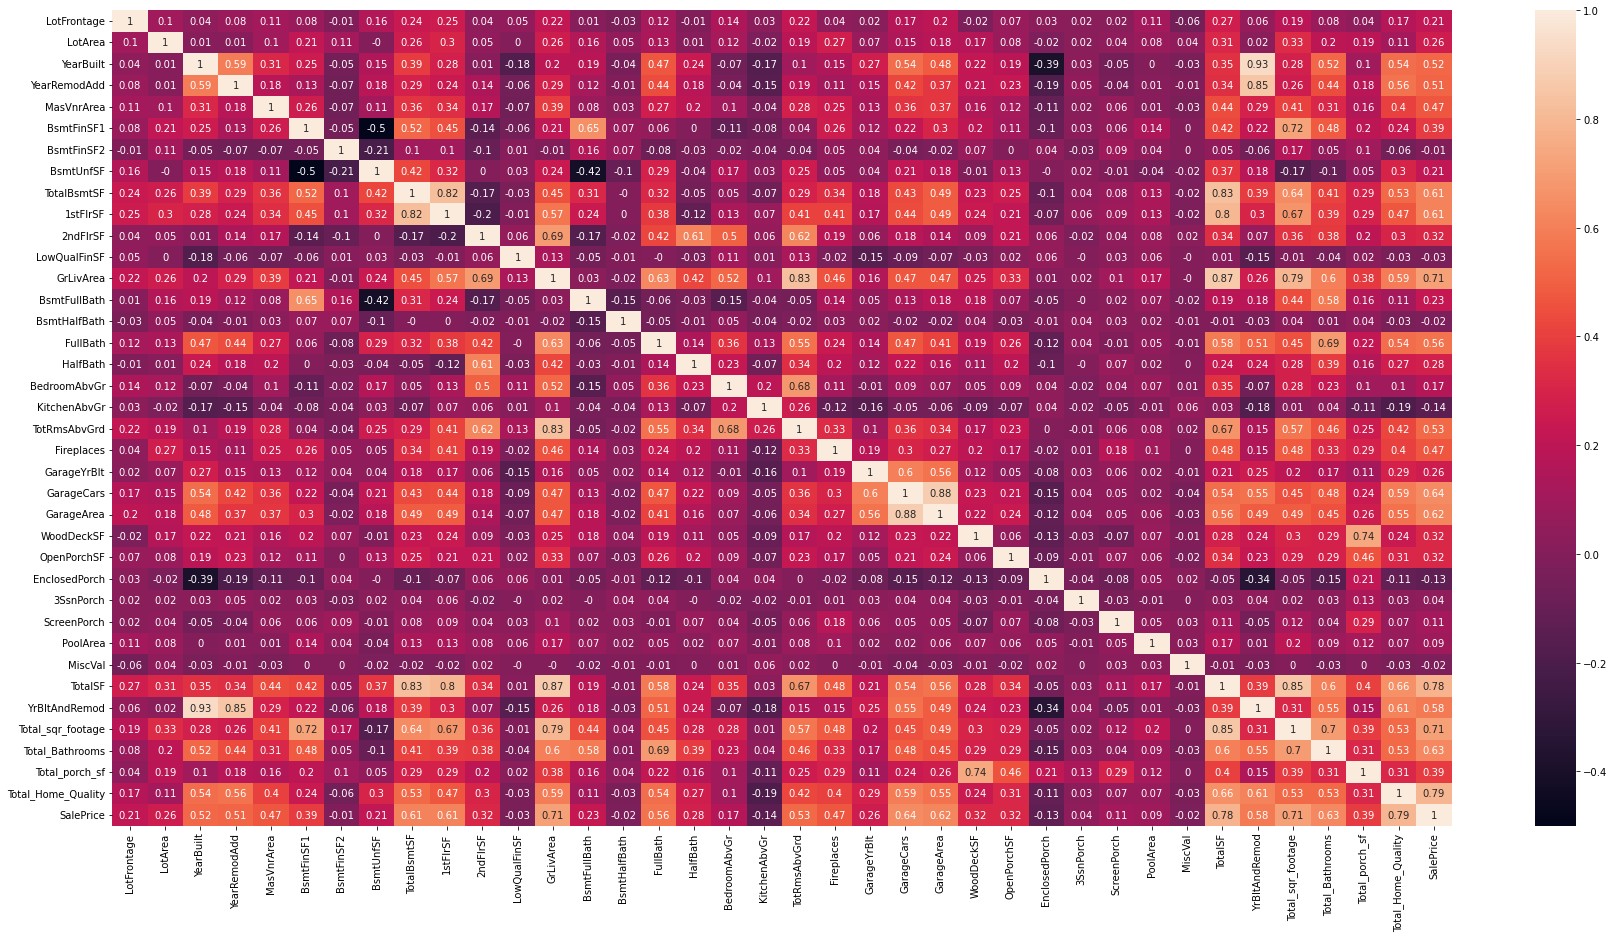

In [9]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(30,15))  
corr = df_Train[float_cols].corr().round(2)
sns.heatmap(corr,annot=True, ax=ax)
plt.show()

In [10]:
for x in str_cols:
    df_Train.loc[:, x] = LabelEncoder().fit_transform(df_Train.loc[:, x])
    df_Test.loc[:, x] = LabelEncoder().fit_transform(df_Test.loc[:, x])

<AxesSubplot:ylabel='Frequency'>

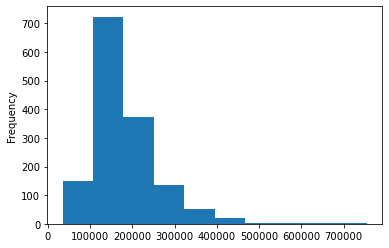

In [11]:
df_Train['SalePrice'].plot.hist()

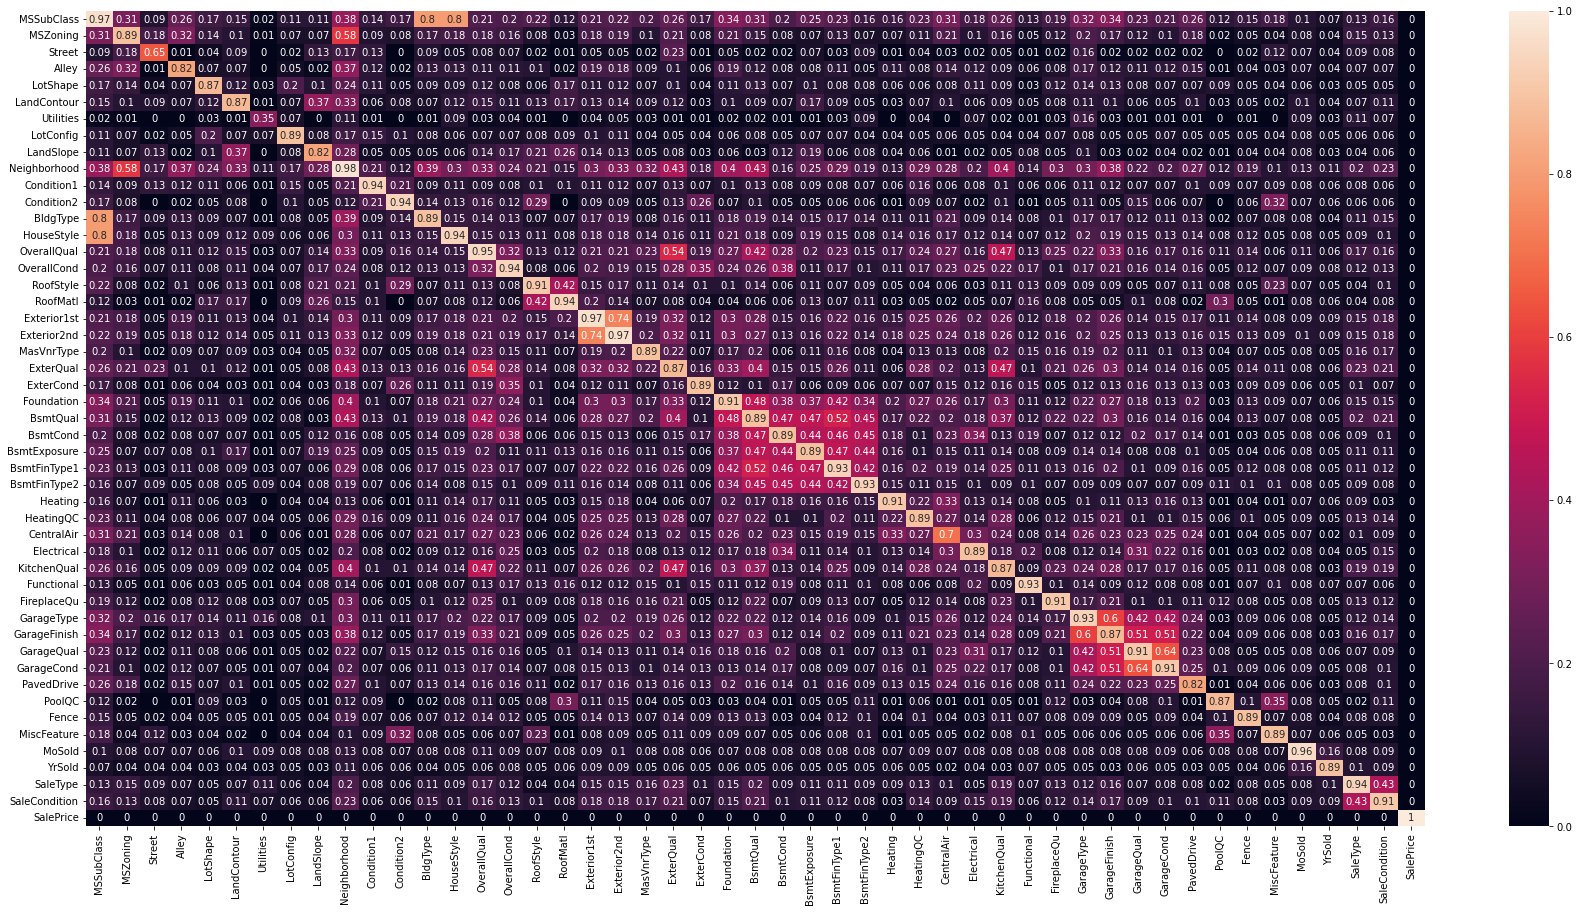

In [12]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

str_anova = list(str_cols)

scaler = StandardScaler()
scaler.fit(df_Train[str_anova])##

df_Train[str_anova] = scaler.fit_transform(df_Train[str_anova])
df_Test[str_anova] = scaler.fit_transform(df_Test[str_anova])

str_anova.append('SalePrice')

rows = []
for var1 in str_anova:
    col = []
    for var2 in str_anova:
        if var1=='SalePrice' or var2=='SalePrice':
            anova = f_oneway(df_Train[var1], df_Train[var2])[1] # ONE WAY ANOVA
            col.append(round(anova,2)) # Keeping of the rounded p-value of the ANOVA 
        else:    
            crosstab = np.array(pd.crosstab(df_Train[var1], df_Train[var2], rownames=None, colnames=None))
            cramers = np.sqrt(chi2_contingency(crosstab)[0]/(np.sum(crosstab)*min(crosstab.shape)-1)) # Cramer's V test
            col.append(round(cramers,2)) 
        
    rows.append(col)

anova_results = pd.DataFrame(np.array(rows), columns=str_anova, index=str_anova)

%matplotlib inline
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(anova_results,annot=True, ax=ax)
plt.show()

In [14]:
#corr.loc[:,'Alley']

Anova and ttest_ind state the same

In [15]:
df_Train.drop([x for x in list(corr.columns) if corr.loc[x,"SalePrice"]!=1 and abs(corr.loc[x,"SalePrice"]) < 0.3 ], 
                axis=1,
                inplace=True)
df_Test.drop([x for x in list(corr.columns) if corr.loc[x,"SalePrice"]!=1 and abs(corr.loc[x,"SalePrice"]) < 0.3 ], 
                axis=1,
                inplace=True)
df_Train.drop(str_cols,
                axis=1,
                inplace=True)
#df_Train.drop([x for x in list(anova_results.columns) if anova_results.loc[x,"SalePrice"]!=1 and abs(anova_results.loc[x,"SalePrice"]) < 0.3 ],
#        axis=1,
#        inplace=True)
df_Test.drop(str_cols,
                axis=1,
                inplace=True)        
#df_Test.drop([x for x in list(anova_results.columns) if anova_results.loc[x,"SalePrice"]!=1 and abs(anova_results.loc[x,"SalePrice"]) < 0.3 ], 
#        axis=1,
#        inplace=True)

df_Train.shape, df_Test.shape

((1460, 22), (1459, 22))

In [16]:
corr[abs(corr['SalePrice'])<0.1].index

Index(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [17]:
float_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'TotalSF', 'YrBltAndRemod', 'Total_sqr_footage',
       'Total_Bathrooms', 'Total_porch_sf', 'Total_Home_Quality', 'SalePrice'],
      dtype='object')

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(StandardScaler().fit_transform(df_Train.iloc[:,0:-1]))
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.41851137 0.11262402 0.09791078 0.07012762 0.04862096 0.04566177
 0.03993367 0.03574676 0.03429772 0.02553973 0.01658079 0.01587631]
[[ 0.2005387   0.18738404  0.17183036  0.15741805  0.23998769  0.23849713
   0.12161669  0.27543947  0.23456957  0.21294927  0.17055577  0.24165379
   0.23972186  0.1343901   0.13698551  0.30493938  0.21774557  0.28125353
   0.26088031  0.15987525  0.26450162]
 [-0.43184675 -0.33357529 -0.00201581 -0.04926756 -0.06799953  0.0206223
   0.34739386  0.3158378   0.0096853   0.3380985   0.16320686 -0.16377676
  -0.13923677  0.02000883  0.06259764  0.15794766 -0.43722166  0.1855975
  -0.01587872  0.14938862 -0.09810276]
 [-0.12316824 -0.22647037  0.0523271   0.41325972  0.36865973  0.36336411
  -0.46998807 -0.12527052 -0.27967452 -0.19917379  0.11828773 -0.06552867
   0.01514103  0.08467854 -0.0654937   0.11809691 -0.18418343  0.18199799
  -0.09745243  0.08057149 -0.10319152]
 [ 0.01004453  0.08680038 -0.12418375 -0.01286279 -0.1055625  -0.13633568
   0.00614

In [20]:
#reduced

In [30]:
list(df_Train.columns)

['YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'TotalSF',
 'YrBltAndRemod',
 'Total_sqr_footage',
 'Total_Bathrooms',
 'Total_porch_sf',
 'Total_Home_Quality',
 'SalePrice']

In [31]:
print(pca.explained_variance_ratio_)

[0.41851137 0.11262402 0.09791078 0.07012762 0.04862096 0.04566177
 0.03993367 0.03574676 0.03429772 0.02553973 0.01658079 0.01587631]


C:\Users\Ricktastic\Anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


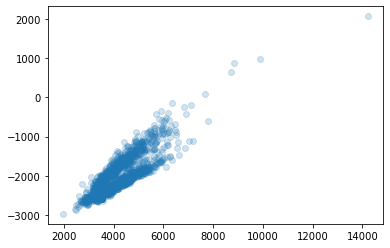

In [36]:
pca_plt = pca.transform(df_Train.drop("SalePrice", axis =1))
plt.scatter(pca_plt[:, 0], pca_plt[:, 1], alpha=0.2)

### Linear Regression

In [37]:
X_train, Y_train = df_Train.iloc[:,:-1], np.log1p(df_Train.iloc[:,-1])
X_test, Y_test = df_Test.iloc[:,:-1], np.log1p(df_Test.iloc[:,-1])

X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((1460, 21), (1459, 21), (1460,), (1459,))

In [38]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

start = time.time()
linear.fit(X_train,Y_train)
print(linear.score(X_train,Y_train))
stop = time.time()

print(f"Training time: {stop - start}s") 

0.8486183334993848
Training time: 0.03499913215637207s


In [39]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
# make predictions
Y_hat = linear.predict(X_test)
# evaluate predictions
RMSE = mean_squared_error(Y_test, Y_hat, squared=False)
r2 = r2_score(Y_test, Y_hat)
mape = np.mean(np.abs(Y_test-Y_hat)/Y_test)

print('Root Mean Square Error: %.5f' %(RMSE))
print('Coefficient of Determination: %.5f' %(r2))
print('Mean Absolute Percent Error: %.5f' %(mape))


Root Mean Square Error: 0.37036
Coefficient of Determination: -15.92623
Mean Absolute Percent Error: 0.02542


In [40]:
p = pd.DataFrame()
p['Id'] = list(df_Test.index) 
p['SalePrice'] = np.expm1(Y_hat)
o = pd.read_csv('test_actual_price.csv')
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)

0.11108192772044986


In [41]:
eva.head()

,Id,SalePrice_pred,SalePrice_actual
0,1461,114782.793755,105000
1,1462,142980.340040,172000
2,1463,169072.397929,189900
3,1464,193367.955577,195500
4,1465,193350.519276,191500


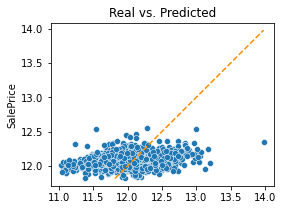

In [42]:
fig = plt.figure(figsize=(4, 3))
sns.scatterplot(x=Y_hat, y= Y_test)
plt.title('Real vs. Predicted')
min_ = max(Y_test.min(),Y_hat.min())
max_ = max(Y_test.max(),Y_hat.max())
plt.plot((min_, max_), (min_, max_), color='darkorange', linestyle='--')
plt.show()

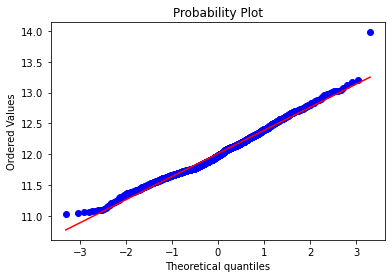

In [43]:
from scipy.stats import probplot
# Probabilty plot to check the residual/kurtosis for sales price column
fig =plt.figure()
residual = probplot(Y_hat, plot=plt)
plt.show()

### XGBoost Regression

In [68]:
from xgboost import XGBRegressor

Boost = XGBRegressor(objective ="reg:squaredlogerror")
start = time.time()
Boost.fit(X_train,Y_train)
print(Boost.score(X_train,Y_train))
stop = time.time()

print(f"Training time: {stop - start}s") 

0.8937375681015275
Training time: 0.07500076293945312s


In [74]:
# make predictions
Y_hat = Boost.predict(X_test)
# evaluate predictions
RMSE = mean_squared_error(Y_test, Y_hat, squared=False)
r2 = r2_score(Y_test, Y_hat)
mape = np.mean(np.abs(Y_test-Y_hat)/Y_test)

print('Root Mean Square Error: %.5f' %(RMSE))
print('Coefficient of Determination: %.5f' %(r2))
print('Mean Absolute Percent Error: %.5f' %(mape))

Root Mean Square Error: 0.37776
Coefficient of Determination: -16.60891
Mean Absolute Percent Error: 0.02584


In [72]:
print(RMSE)

190768.95648776236


In [75]:
p = pd.DataFrame()
p['Id'] = list(df_Test.index) 
p['SalePrice'] = np.expm1(Y_hat)
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)

0.10477814857634768


In [76]:
eva.head()

,Id,SalePrice_pred,SalePrice_actual
0,1461,124176.281250,105000
1,1462,153288.343750,172000
2,1463,180466.984375,189900
3,1464,180758.250000,195500
4,1465,196280.562500,191500


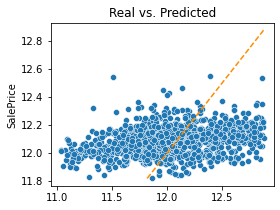

In [77]:
fig = plt.figure(figsize=(4, 3))
sns.scatterplot(x=Y_hat, y= Y_test)
plt.title('Real vs. Predicted')
min_ = max(Y_test.min(),Y_hat.min())
max_ = max(Y_test.max(),Y_hat.max())
plt.plot((min_, max_), (min_, max_), color='darkorange', linestyle='--')
plt.show()

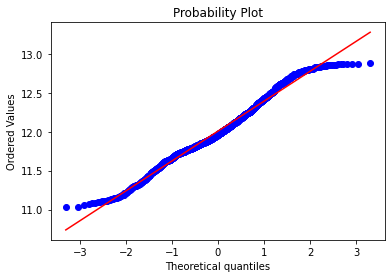

In [78]:
# Probabilty plot to check the residual/kurtosis for sales price column
fig =plt.figure()
residual = probplot(Y_hat, plot=plt)
plt.show()

### Ridge Regression

In [79]:
from sklearn.linear_model import Ridge

rReg = Ridge()

start = time.time()
rReg.fit(X_train,Y_train)
print(rReg.score(X_train,Y_train))
stop = time.time()

print(f"Training time: {stop - start}s") 

0.8486181143939495
Training time: 0.004002094268798828s


In [80]:
# make predictions
Y_hat = rReg.predict(X_test)
# evaluate predictions
RMSE = mean_squared_error(Y_test, Y_hat, squared=False)
r2 = r2_score(Y_test, Y_hat)
mape = np.mean(np.abs(Y_test-Y_hat)/Y_test)

print('Root Mean Square Error: %.5f' %(RMSE))
print('Coefficient of Determination: %.5f' %(r2))
print('Mean Absolute Percent Error: %.5f' %(mape))

Root Mean Square Error: 0.37033
Coefficient of Determination: -15.92321
Mean Absolute Percent Error: 0.02541


In [81]:
p = pd.DataFrame()
p['Id'] = list(df_Test.index) 
p['SalePrice'] = np.expm1(Y_hat)
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)

0.11106026445236426


In [82]:
eva.head()

,Id,SalePrice_pred,SalePrice_actual
0,1461,114866.304650,105000
1,1462,143015.710751,172000
2,1463,169088.181815,189900
3,1464,193382.161753,195500
4,1465,193390.128429,191500


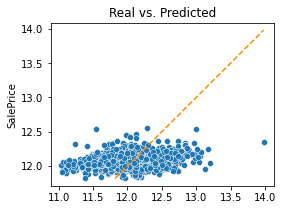

In [83]:
fig = plt.figure(figsize=(4, 3))
sns.scatterplot(x=Y_hat, y= Y_test)
plt.title('Real vs. Predicted')
min_ = max(Y_test.min(),Y_hat.min())
max_ = max(Y_test.max(),Y_hat.max())
plt.plot((min_, max_), (min_, max_), color='darkorange', linestyle='--')
plt.show()

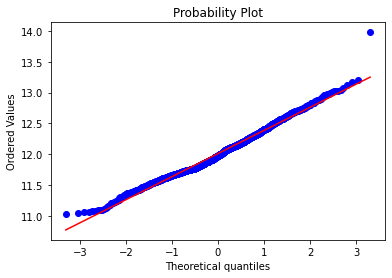

In [84]:
# Probabilty plot to check the residual/kurtosis for sales price column
fig =plt.figure()
residual = probplot(Y_hat, plot=plt)
plt.show()

### Lasso Regression

In [85]:
from sklearn.linear_model import Lasso

laReg = Lasso()

start = time.time()
laReg.fit(X_train,Y_train)
print(laReg.score(X_train,Y_train))
stop = time.time()

print(f"Training time: {stop - start}s") 

0.7807393294814875
Training time: 0.0059320926666259766s


In [86]:
# make predictions
Y_hat = laReg.predict(X_test)
# evaluate predictions
RMSE = mean_squared_error(Y_test, Y_hat, squared=False)
r2 = r2_score(Y_test, Y_hat)
mape = np.mean(np.abs(Y_test-Y_hat)/Y_test)

print('Root Mean Square Error: %.5f' %(RMSE))
print('Coefficient of Determination: %.5f' %(r2))
print('Mean Absolute Percent Error: %.5f' %(mape))

Root Mean Square Error: 0.33163
Coefficient of Determination: -12.57139
Mean Absolute Percent Error: 0.02283


In [87]:
p = pd.DataFrame()
p['Id'] = list(df_Test.index) 
p['SalePrice'] = np.expm1(Y_hat)
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)

0.1366081899426455


In [88]:
eva.head()

,Id,SalePrice_pred,SalePrice_actual
0,1461,135043.375680,105000
1,1462,149195.453171,172000
2,1463,193908.225965,189900
3,1464,195410.737519,195500
4,1465,172560.411430,191500


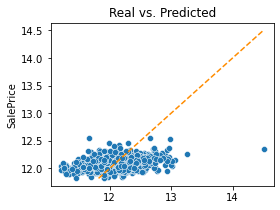

In [89]:
fig = plt.figure(figsize=(4, 3))
sns.scatterplot(x=Y_hat, y= Y_test)
plt.title('Real vs. Predicted')
min_ = max(Y_test.min(),Y_hat.min())
max_ = max(Y_test.max(),Y_hat.max())
plt.plot((min_, max_), (min_, max_), color='darkorange', linestyle='--')
plt.show()

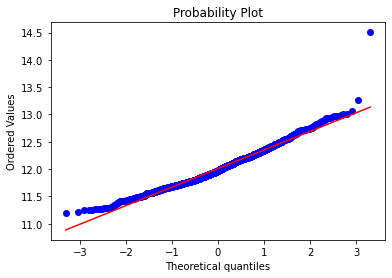

In [90]:
# Probabilty plot to check the residual/kurtosis for sales price column
fig =plt.figure()
residual = probplot(Y_hat, plot=plt)
plt.show()